### Oral Health Impact Profile-14 (OHIP-14) Analysis on Postoperative Patients

Orthognathic surgery is a surgical procedure performed on the jaws to correct their misalignment. Mild misalignment of the teeth or the jaws does not impact the quality of life significantly. However,
severe misalignment can cause difficulty with average daily living (ADL) functions such as biting through and chewing food. It can also cause frequent tongue or cheek biting which can cause discomfort
in the mouth. Orthognathic surgery is an elective but an important surgery that can improve the quality of life in a person with severe dentofacial deformity. One way to gauge how the quality of life 
changes after surgery is by Oral Health Impact Profile (OHIP) questionnaires. The question posed is, is there a significant improvement in the OHIP scores after surgery? 

The initial data collection was done by exporting the necessary data from the REDCap daatabse in Excel/CSV format. Two files were exported: surgical arm and initial arm. The spreadsheet was skimmed and there were multiple rows missing data but they were left alone as I wanted to address them with Python for data cleaning. The surgical arm spreadsheet was the target spreadsheet to initiate the process of filling in the gaps. The surgical arm spreadsheet did not contain the initial visit data so the data was imported using INDEX and MATCH function. 

Once all the desired values were entered into one spreadsheet, the data analysis using Python was initiated.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os

In [6]:
df = pd.read_csv('ohip_all.csv')

In [7]:
df.head()

,Patient ID,Event Name,Date of Visit:,1. Had trouble pronouncing words,2. Felt sense of taste has worsened,3. Had painful aching in the mouth,4. Found it uncomfortable to eat any foods,5. Have been self-conscious,6. Felt tense,7. Had an unsatisfactory diet,...,10. Have been a bit embarrassed,11. Have been irritable with other people,12. Had difficulty doing usual jobs,13. Felt life in general was less satisfying,14. Have been totally unable to function,Total:,Score Interpretation:,Is patient CI?,"If yes, comment:",Complete?
0,CARSH_00069,Post Op 3 Months (Arm 2: Surgical Cases),1/31/2019,Never (0),Never (0),Never (0),Hardly ever (1),Hardly ever (1),Never (0),Never (0),...,Never (0),Never (0),Never (0),Never (0),Never (0),2.0,Little to none,NaN,NaN,Complete
1,CARSH_00069,Post Op 6 Months (Arm 2: Surgical Cases),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CARSH_00069,Post Op 1 Year (Arm 2: Surgical Cases),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CARSH_00069,Post Op 1 Year (Arm 2: Surgical Cases),1/9/2020,Never (0),Never (0),Never (0),Never (0),Never (0),Never (0),Never (0),...,Never (0),Never (0),Never (0),Never (0),Never (0),0.0,Little to none,NaN,NaN,Complete
4,CARSH_00092,Post Op 3 Months (Arm 2: Surgical Cases),7/26/2019,Occasionally (2),Never (0),Occasionally (2),Often (3),Often (3),Often (3),Hardly ever (1),...,Occasionally (2),Often (3),Hardly ever (1),Often (3),Never (0),27.0,Moderate,NaN,NaN,Complete


In [8]:
df.shape

(134, 22)

In [9]:
# Check which columns are beyond the first two
cols_to_check = df.columns[2:]

# Drop rows where all of these columns are empty (NaN or empty strings)
# First, replace empty strings with NaN for consistency
df[cols_to_check] = df[cols_to_check].replace('', pd.NA)

# Now filter rows where NOT all cols_to_check are NA
df = df[df[cols_to_check].notna().any(axis=1)]

# Save or work with df
print(df)

      Patient ID                                Event Name Date of Visit:  \
0    CARSH_00069  Post Op 3 Months (Arm 2: Surgical Cases)      1/31/2019   
3    CARSH_00069    Post Op 1 Year (Arm 2: Surgical Cases)       1/9/2020   
4    CARSH_00092  Post Op 3 Months (Arm 2: Surgical Cases)      7/26/2019   
6    CARSH_00092  Post Op 6 Months (Arm 2: Surgical Cases)     12/19/2019   
7    CARSH_00101  Post Op 3 Months (Arm 2: Surgical Cases)     10/29/2018   
..           ...                                       ...            ...   
129  CARSH_00245    Initial Visit (Arm 1: Natural History)              0   
130  CARSH_00246    Initial Visit (Arm 1: Natural History)              0   
131  CARSH_00254    Initial Visit (Arm 1: Natural History)              0   
132  CARSH_00256    Initial Visit (Arm 1: Natural History)              0   
133  CARSH_00258    Initial Visit (Arm 1: Natural History)              0   

    1. Had trouble pronouncing words 2. Felt sense of taste has worsened  \

In [10]:
df.dtypes

Patient ID                                       object
Event Name                                       object
Date of Visit:                                   object
1. Had trouble pronouncing words                 object
2. Felt sense of taste has worsened              object
3. Had painful aching in the mouth               object
4. Found it uncomfortable to eat any foods       object
5. Have been self-conscious                      object
6. Felt tense                                    object
7. Had an unsatisfactory diet                    object
8. Had to interrupt meals                        object
9. Found it difficult to relax                   object
10. Have been a bit embarrassed                  object
11. Have been irritable with other people        object
12. Had difficulty doing usual jobs              object
13. Felt life in general was less satisfying     object
14. Have been totally unable to function         object
Total:                                          

In [11]:
df.columns

Index(['Patient ID', 'Event Name', 'Date of Visit:',
       '1. Had trouble pronouncing words',
       '2. Felt sense of taste has worsened',
       '3. Had painful aching in the mouth',
       '4. Found it uncomfortable to eat any foods',
       '5. Have been self-conscious', '6. Felt tense',
       '7. Had an unsatisfactory diet', '8. Had to interrupt meals',
       '9. Found it difficult to relax', '10. Have been a bit embarrassed',
       '11. Have been irritable with other people',
       '12. Had difficulty doing usual jobs',
       '13. Felt life in general was less satisfying',
       '14. Have been totally unable to function', 'Total:',
       'Score Interpretation:', 'Is patient CI?  ', 'If yes, comment:',
       'Complete?'],
      dtype='object')

In [12]:
df.drop(['Date of Visit:', 'Is patient CI?  ','If yes, comment:'], axis=1, inplace=True)

In [13]:
df.rename(columns={
    'Total:': 'total',
    'Date of Visit:': 'visit_date',
    'Event Name':'event_name'
}, inplace=True)

#renaming columns to make it easier for processing and removing special characters

In [14]:
# Define conditions and corresponding choices
conditions = [
    (df['total'] <= 7),
    (df['total'] > 7) & (df['total'] <= 15),
    (df['total'] > 15) & (df['total'] < 29),
    (df['total'] >= 29)
]

choices = ['Little to None', 'Mild', 'Moderate', 'Severe']

# Apply the conditions
df['Score Interpretation:'] = np.select(conditions, choices, default='Unknown')

In [15]:
df['event_name'].unique()

array(['Post Op 3 Months (Arm 2: Surgical Cases)',
       'Post Op 1 Year (Arm 2: Surgical Cases)',
       'Post Op 6 Months (Arm 2: Surgical Cases)',
       'Initial Visit (Arm 1: Natural History)'], dtype=object)

In [19]:
# Group by category and get basic stats
grouped_stats = df.groupby('event_name')['total'].describe()
print(grouped_stats)

                                          count       mean       std  min  \
event_name                                                                  
Initial Visit (Arm 1: Natural History)     32.0  13.687500  9.529030  0.0   
Post Op 1 Year (Arm 2: Surgical Cases)     13.0   3.000000  4.582576  0.0   
Post Op 3 Months (Arm 2: Surgical Cases)   10.0   6.600000  8.329332  0.0   
Post Op 6 Months (Arm 2: Surgical Cases)   13.0   6.461538  7.229746  0.0   

                                           25%   50%    75%   max  
event_name                                                         
Initial Visit (Arm 1: Natural History)    5.50  13.0  19.25  32.0  
Post Op 1 Year (Arm 2: Surgical Cases)    0.00   1.0   3.00  16.0  
Post Op 3 Months (Arm 2: Surgical Cases)  1.25   3.0   9.00  27.0  
Post Op 6 Months (Arm 2: Surgical Cases)  1.00   2.0  11.00  21.0  


In [21]:
# renaming the time points
timepoint_map = {
    'Initial Visit (Arm 1: Natural History)': 'Baseline',
    'Post Op 3 Months (Arm 2: Surgical Cases)': 'POM 3',
    'Post Op 6 Months (Arm 2: Surgical Cases)': 'POM 6',
    'Post Op 1 Year (Arm 2: Surgical Cases)': 'POY 1'
}

df['event_name'] = df['event_name'].map(timepoint_map)


In [23]:
order = ['Baseline', 'POM 3', 'POM 6', 'POY 1']
df['event_name'] = pd.Categorical(df['event_name'], categories=order, ordered=True)

To generally gauge how the datapoints look, the entire dataset was plotted. Overall, there seems to be decrease in the OHIP scores over time. The significance of each time point is still not seen yet.

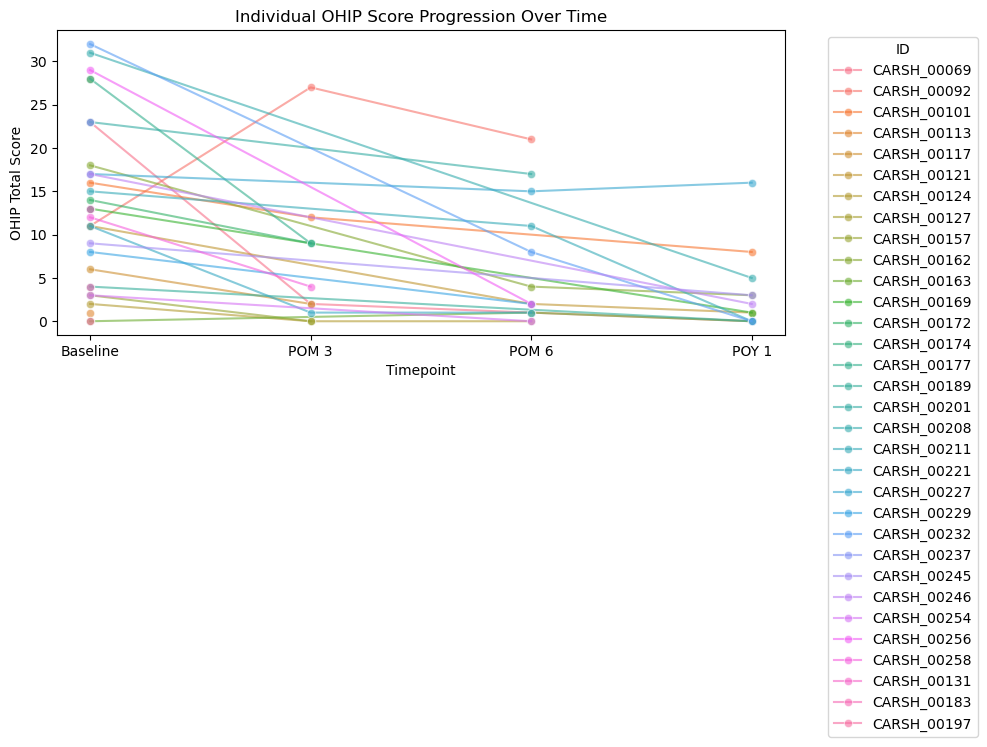

In [32]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='event_name', y='total', hue='Patient ID', marker='o', legend=True, alpha=0.6)
plt.xlabel('Timepoint')
plt.ylabel('OHIP Total Score')
plt.title('Individual OHIP Score Progression Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='ID')
plt.tight_layout()
plt.show()

Decision was made to plot each of the time points to break down the dataset and compare more easily. The comparison charts were created.

In [35]:
def get_paired_data(df, timepoint1, timepoint2):
    # Keep only rows from the two timepoints
    pair_df = df[df['event_name'].isin([timepoint1, timepoint2])]

    # Keep only subjects who have both timepoints
    subject_counts = pair_df.groupby('Patient ID')['event_name'].nunique()
    valid_subjects = subject_counts[subject_counts == 2].index
    paired = pair_df[pair_df['Patient ID'].isin(valid_subjects)]

    return paired

In [45]:
def plot_spaghetti(paired_df, timepoint1, timepoint2):
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=paired_df, x='event_name', y='total', hue='Patient ID', marker='o', legend=True, alpha=0.7)
    plt.title(f'OHIP Scores: {timepoint1} to {timepoint2}')
    plt.xlabel('Timepoint')
    plt.ylabel('OHIP Total Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='ID')
    plt.tight_layout()
    plt.show()

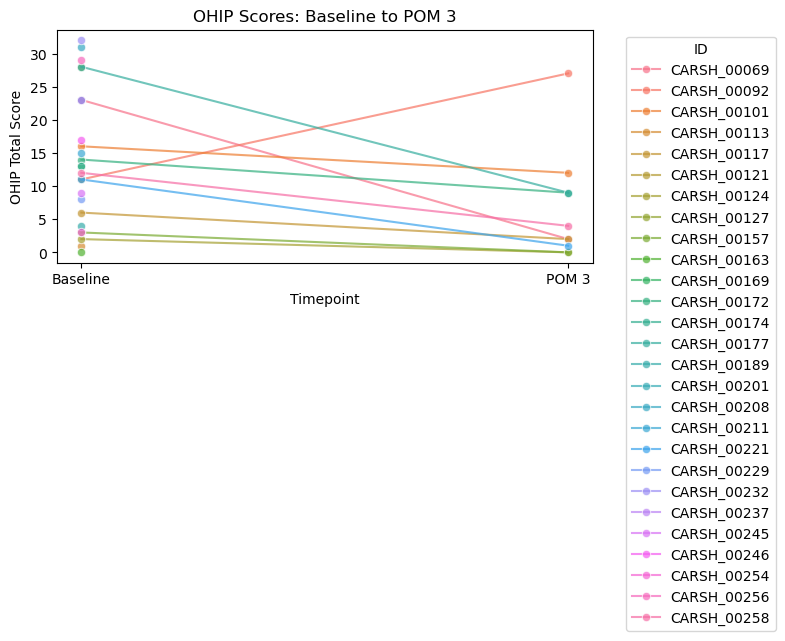

In [47]:
paired1 = get_paired_data(df, 'Baseline', 'POM 3')
plot_spaghetti(paired1, 'Baseline', 'POM 3')

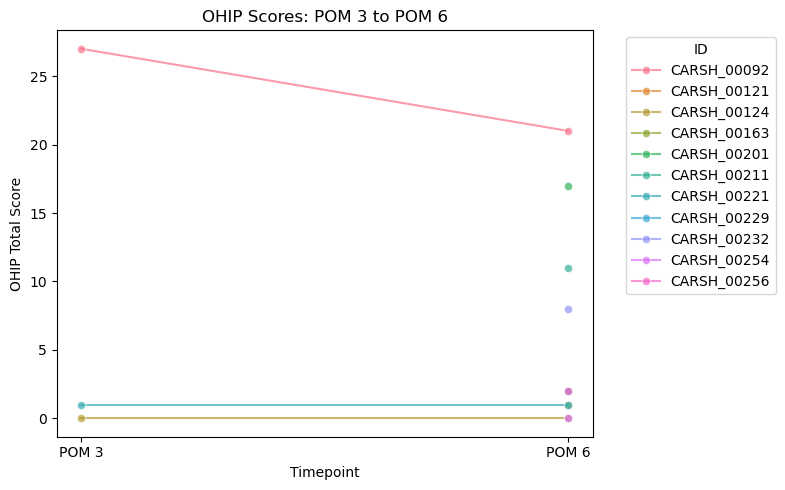

In [49]:
paired2 = get_paired_data(df, 'POM 3', 'POM 6')
plot_spaghetti(paired2, 'POM 3', 'POM 6')

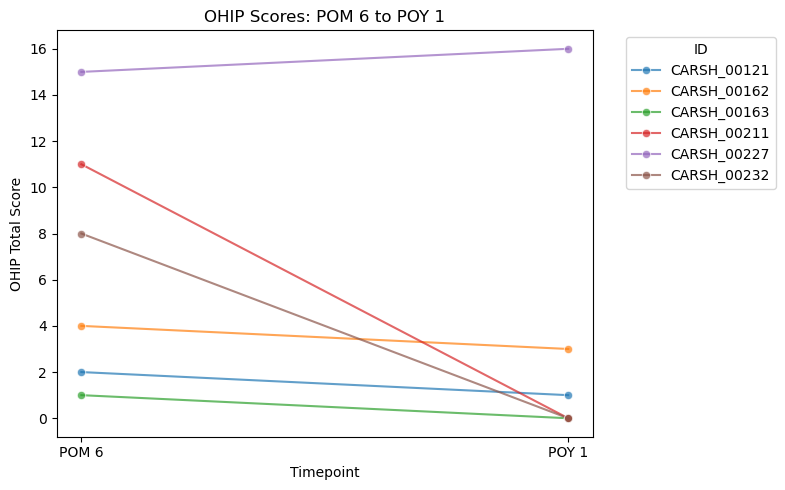

In [51]:
paired3 = get_paired_data(df, 'POM 6', 'POY 1')
plot_spaghetti(paired3, 'POM 6', 'POY 1')

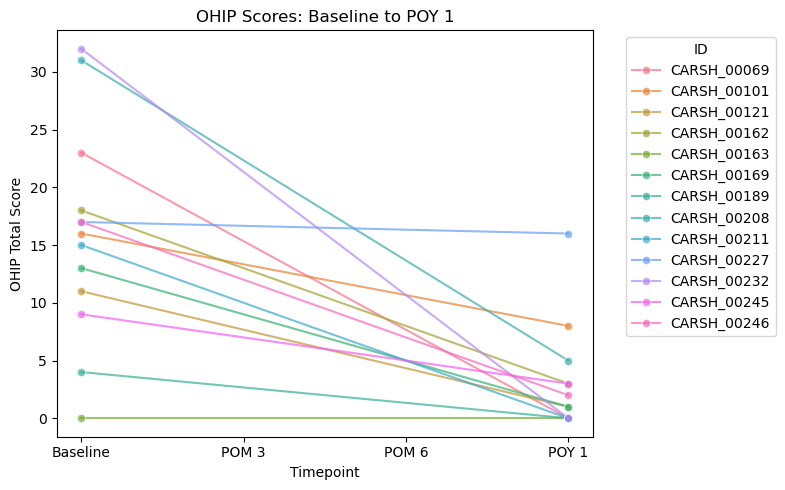

In [53]:
paired4 = get_paired_data(df, 'Baseline', 'POY 1')
plot_spaghetti(paired4, 'Baseline', 'POY 1')

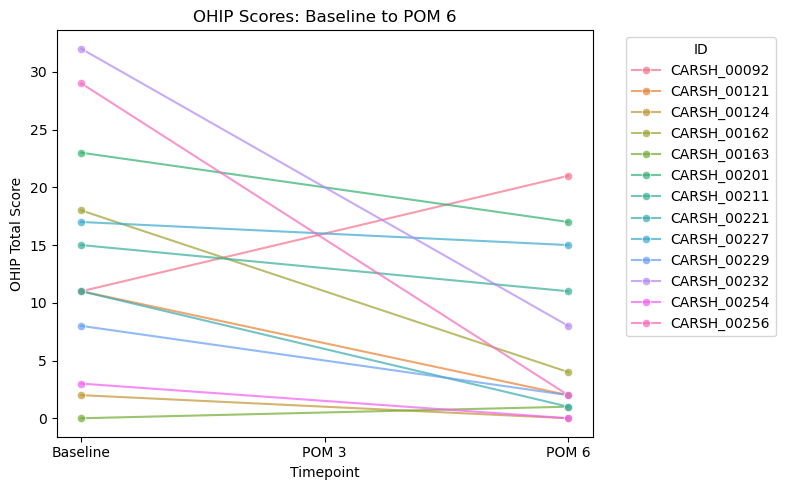

In [55]:
paired5 = get_paired_data(df, 'Baseline', 'POM 6')
plot_spaghetti(paired5, 'Baseline', 'POM 6')

In [63]:
subset = df[df['event_name'].isin(['POM 6', 'POY 1'])]
unique_subjects = subset['Patient ID'].nunique()
print(f"Number of subjects with POM 6 or POY 1 data: {unique_subjects}")

Number of subjects with POM 6 or POY 1 data: 20


In [61]:
pom6_ids = set(df[df['event_name'] == 'POM 6']['Patient ID'])
poy1_ids = set(df[df['event_name'] == 'POY 1']['Patient ID'])

both = pom6_ids & poy1_ids
either = pom6_ids | poy1_ids
only_pom6 = pom6_ids - poy1_ids
only_poy1 = poy1_ids - pom6_ids

print(f"Subjects with both POM 6 and POY 1: {len(both)}")
print(f"Subjects with either: {len(either)}")
print(f"Only POM 6: {len(only_pom6)}")
print(f"Only POY 1: {len(only_poy1)}")


Subjects with both POM 6 and POY 1: 6
Subjects with either: 20
Only POM 6: 7
Only POY 1: 7


In [85]:
from scipy.stats import wilcoxon

# Filter subjects who have both POM 3 and POM 6
paired = df[df['event_name'].isin(['POM 3', 'POM 6'])]
paired_wide = paired.pivot(index='Patient ID', columns='event_name', values='total').dropna()

# Wilcoxon test
stat, p = wilcoxon(paired_wide['POM 3'], paired_wide['POM 6'])
print(f"Wilcoxon POM 3 vs POM 6: stat={stat:.3f}, p={p:.3f}")

Wilcoxon POM 3 vs POM 6: stat=0.000, p=0.317


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_wilcoxon.py:199: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


In [91]:
# Filter subjects who have both POM 3 and POM 6
paired = df[df['event_name'].isin(['POM 6', 'POY 1'])]
paired_wide = paired.pivot(index='Patient ID', columns='event_name', values='total').dropna()

# Wilcoxon test
stat, p = wilcoxon(paired_wide['POM 6'], paired_wide['POY 1'])
print(f"Wilcoxon POM 6 vs POY 1: stat={stat:.3f}, p={p:.3f}")

Wilcoxon POM 6 vs POY 1: stat=2.500, p=0.156


In [95]:
# Filter subjects who have both POM 3 and POM 6
paired = df[df['event_name'].isin(['Baseline', 'POY 1'])]
paired_wide = paired.pivot(index='Patient ID', columns='event_name', values='total').dropna()

# Wilcoxon test
stat, p = wilcoxon(paired_wide['Baseline'], paired_wide['POY 1'])
print(f"Wilcoxon Baseline vs POY 1: stat={stat:.3f}, p={p:.3f}")

Wilcoxon Baseline vs POY 1: stat=0.000, p=0.002


In [75]:
# Filter subjects who have both POM 3 and POM 6
paired = df[df['event_name'].isin(['Baseline', 'POM 6'])]
paired_wide = paired.pivot(index='Patient ID', columns='event_name', values='total').dropna()

# Wilcoxon test
stat, p = wilcoxon(paired_wide['Baseline'], paired_wide['POM 6'])
print(f"Wilcoxon Baseline vs POM 6: stat={stat:.3f}, p={p:.3f}")

Wilcoxon Baseline vs POM 6: stat=10.500, p=0.013


The distribution of these data points are not normalized so non parametric paired test was performed for statistical significance. There was no statistical significance between POM 3 and POM 6 or POM 6 and POY 1. However, there was statistical significance between baseline and POM 6 as well as baseline and POY 1. 

The trend for the OHIP scores is that it tends to decrease after surgery which means that their quality of life increased after surgery. It appears that both POM 6 and POM 12 have statitiscal significance compared to baseline, but there is no statistical significance between the time points POM 6 and POM 12. Thus, the decision was made to either collect POM 6 or POM 12 OHIP scores for assessing the impact of the orthognathic surgery in the future as we continue to collect data on postsurgical patients. By being able to collect either POM 6 or POY 1, it would 